# FEATURE ENGINEERING, FEATURE SELECTION, MODEL BUILDING

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer, StandardScaler, MinMaxScaler
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import RFE,SelectKBest
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.feature_selection import f_classif, chi2

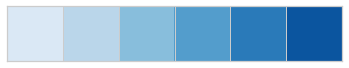

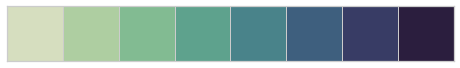

In [65]:
from palettable.colorbrewer.diverging import *

sns.set(style='whitegrid', palette="Spectral_r")
cb_pal = sns.cubehelix_palette(8, start=0.5, rot=-.75)
cpal = sns.color_palette("Blues")
sns.palplot(cpal)
sns.palplot(cb_pal)

In [3]:
# Loading the Data
df_test = pd.read_csv('./file/test.csv')
df_train = pd.read_csv('./file/train.csv')

# Feature Engineering

## Numerical Data

### Handling Outliers

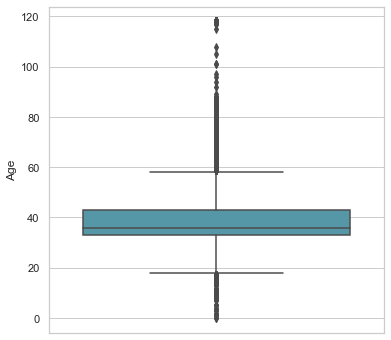

In [6]:
#Box Plot before outlier treatment
plt.figure(figsize=(6,6))
ax = sns.boxplot(y=df_train["Age"])

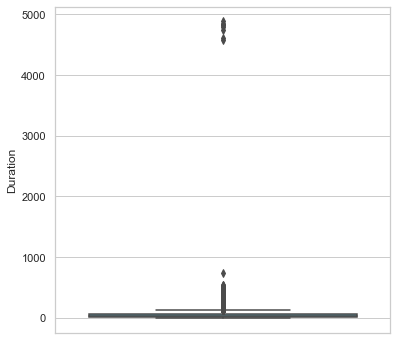

In [9]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(y=df_train["Duration"])

- Duration: Min = -2 Max = 4881 But can insurance company giving insurance for 4881 days? <br>
Insurance company do not give insurance over 360 days. Further extension will be provided for 180 days.
we are considering 540 days as a limit.

- Age. Min = 0 Max = 118 age 0 can be possible but 118 too old however we need to check too old people gets insurance or not. So,Insurance Companies do not give insurance over an age of 85.However there are few who provide insurance upto age of 99. so we treat the values above 100.

In [11]:
df_train[df_train['Duration'] > 540 ].shape
df_train[df_train['Age'] > 99 ].shape


(737, 11)

In [13]:
pre_processing(df_train)

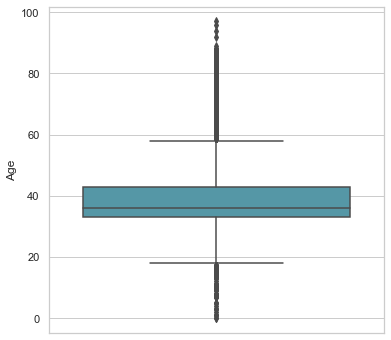

In [14]:
#Box Plot after outlier treatment
plt.figure(figsize=(6,6))
ax = sns.boxplot(y = df_train["Age"])

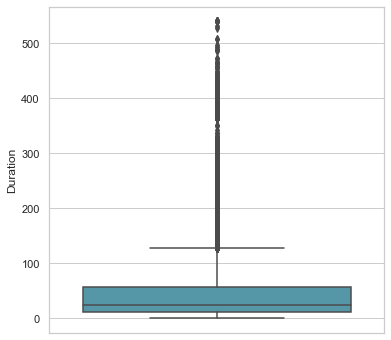

In [15]:
plt.figure(figsize=(6,6))
ax = sns.boxplot(y = df_train["Duration"])

In [16]:
df_train.head(2)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim,Age Group
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.0,41.0,0,Adult
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.0,35.0,0,Adult


In [17]:
df_test.head(2)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.0,36
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.0,36


## Categorical Data


#### One Hot Encoding

In [19]:
# Categorical Columns to drop 
cat_col = ['Agency', 'Agency Type', 'Distribution Channel', 'Product Name', 'Destination']

In [20]:
X_cat = df_train[cat_col]
X_cat.head(2)
X_cat_one_hot_train = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot_train.columns
for col in cat_proc_columns:
    df_train[col] = X_cat_one_hot_train[col] 
    
df_train.head(2)

,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,2010,EPX,Travel Agency,Online,Cancellation Plan,61,PHILIPPINES,12.0,0.0,41.0,...,0,0,0,0,0,0,0,0,0,0
1,4245,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,17.0,0.0,35.0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
X_cat = df_test[cat_col]
X_cat_one_hot = pd.get_dummies(X_cat, drop_first=True)

#Merge With original df
cat_proc_columns = X_cat_one_hot.columns
for col in cat_proc_columns:
    df_test[col] = X_cat_one_hot[col] 
    
df_test.head(2)



,ID,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,17631,EPX,Travel Agency,Online,Cancellation Plan,192,HONG KONG,18.0,0.0,36,...,0,0,0,0,0,0,0,0,0,0
1,15064,EPX,Travel Agency,Online,1 way Comprehensive Plan,2,SINGAPORE,20.0,0.0,36,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_test = df_test.drop(columns = cat_col)
df_train = df_train.drop(columns = cat_col)

In [23]:
df_test = df_test.drop(columns=['ID'])
df_test.head(2)

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,192,18.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,20.0,0.0,36,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df_train = df_train.drop(columns=['ID'])
df_train.head(2)

,Duration,Net Sales,Commision (in value),Age,Claim,Age Group,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,61,12.0,0.0,41.0,0,Adult,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,17.0,0.0,35.0,0,Adult,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Feature Selection

## Numerical Data [Co-relation ]


In [26]:
updated_data = df_train
updated_data_test = df_test

In [27]:
# checking crelation in numerical column
#num_df=updated_data.select_dtypes(include=['number']).copy()
df_num = df_train[['Duration', 'Age', 'Net Sales', 'Commision (in value)', 'Claim']]

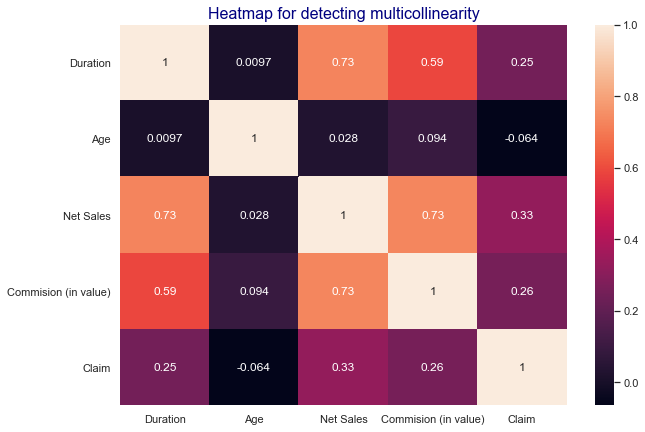

In [28]:
#ploting heatmap to check corelation in numerical feature in data.
fig = plt.figure(figsize=(10, 7))
sns.heatmap(df_num.corr(), annot=True)
plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
plt.show()

- Highest Co related features are Net Sales vs Commission. Further Process or drop.



### Numerical Input, Categorical Output ==> ANOVA

In [29]:
df_num = df_train[['Duration', 'Age', 'Net Sales', 'Commision (in value)', 'Claim']]
df_num = df_num[df_num.Duration > 0]
X = df_num.iloc[:,:-1]
y = df_num.iloc[:,-1]

# Apply Anova and fit the logistic model on train data use df dataset
nof_list   = [1, 2, 3, 4]
high_score = 0
nof        = 0

for n in nof_list:
    test = SelectKBest(score_func = f_classif , k = n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    
    if model.score(X_test,y_test) > high_score:
        high_score = model.score(X_test, y_test)
        model_ = model
        nof=n 
    print("High Score is:",high_score, "with features=", nof)

For no of features= 1 , score= 0.9312543842867164
High Score is: 0.9312543842867164 with features= 1
For no of features= 2 , score= 0.9308717556278299
High Score is: 0.9312543842867164 with features= 1
For no of features= 3 , score= 0.9065748357885339
High Score is: 0.9312543842867164 with features= 1
For no of features= 4 , score= 0.9251960971876794
High Score is: 0.9312543842867164 with features= 1


- High Score is for 1. Not changing much can go ahead with 4 features 

### Categorical Input, Categorical Output ==> CHI 2


In [31]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])

plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

ValueError: could not convert string to float: 'Adult'

<Figure size 720x720 with 0 Axes>

In [34]:
# Apply Chi2 and fit the logistic model on train data use df dataset
nof_list   = [10, 20, 30, 50, 80, 100, 130]
high_score = 0
nof        = 0

for n in nof_list:
    test = SelectKBest(score_func = chi2 , k = n)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, \
                                                        random_state = 42)
    
    X_train = test.fit_transform(X_train,y_train)
    X_test = test.transform(X_test)
    
    model = RandomForestClassifier()
    model.fit(X_train,y_train)
    
    print("For no of features=",n,", score=", model.score(X_test,y_test))
    
    if model.score(X_test,y_test) > high_score:
        high_score = model.score(X_test, y_test)
        model_ = model
        nof=n 
    print("High Score is:",high_score, "with features=",nof)

ValueError: could not convert string to float: 'Adult'

In [36]:
## Decision Tree Classifier

In [37]:
df_train = df_train.drop(columns='Age Group')

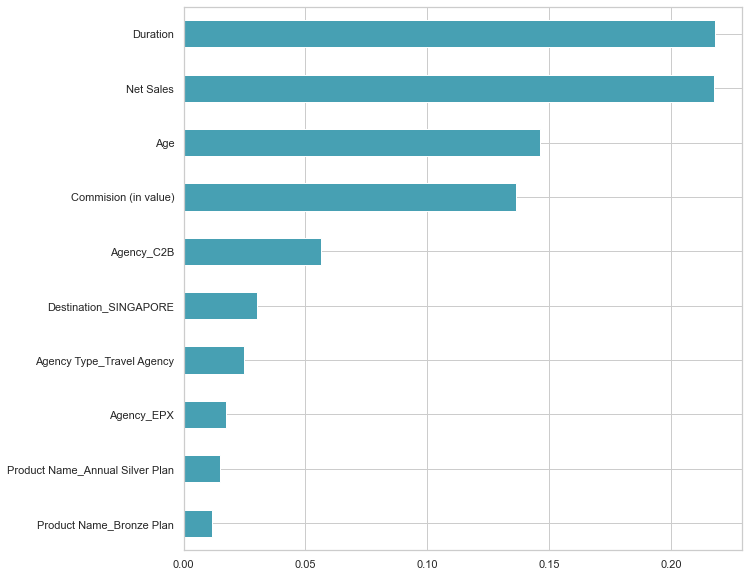

In [38]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])

plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250, random_state=0)
forest.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

## XGBOOST CLASSIFIER


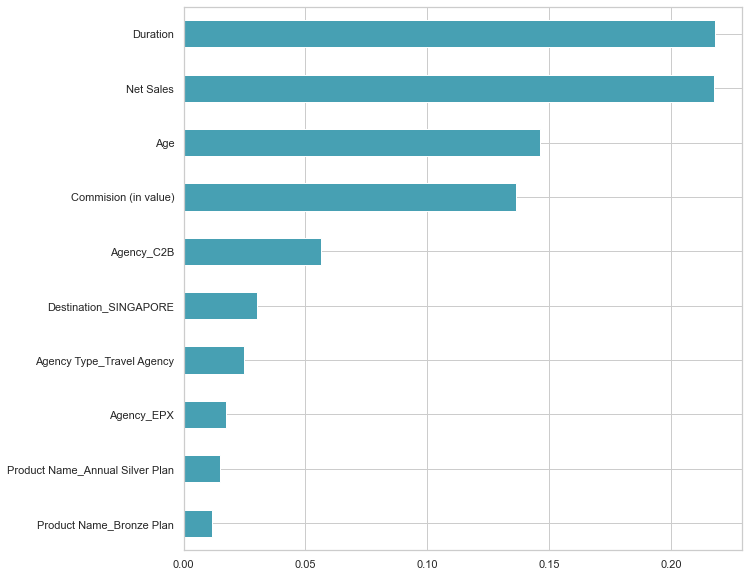

In [39]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])

plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
XGB = XGBClassifier(n_estimators=250, random_state=0)
XGB.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [40]:
feat_importances.nlargest(10)

Duration                           0.218158
Net Sales                          0.217586
Age                                0.146080
Commision (in value)               0.136231
Agency_C2B                         0.056409
Destination_SINGAPORE              0.029906
Agency Type_Travel Agency          0.024619
Agency_EPX                         0.017199
Product Name_Annual Silver Plan    0.014957
Product Name_Bronze Plan           0.011754
dtype: float64

# Model Selection

In [41]:
y = updated_data['Claim']
X = updated_data.drop(columns=['Claim'])

In [42]:
X = X.drop(columns='Age Group')
X.head(3)

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
0,61,12.0,0.00,41.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,17.0,0.00,35.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26,19.8,11.88,47.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## With Imbalance Dataset

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
scaler = StandardScaler()
#scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)
updated_data_test1 = scaler.transform(updated_data_test)

## Balanced Dataset [SMOTE]


In [45]:
smote = SMOTE(random_state=7)
X_SMOTE, y_SMOTE = smote.fit_resample(X, y)
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_SMOTE, y_SMOTE, test_size=0.10, random_state=42)

## Balanced Dataset [SMOTE Tomek]

In [46]:
tomek = SMOTETomek(random_state=42)
X_SMOTE_TK, y_SMOTE_TK = smote.fit_resample(X, y)
X_train_smotetk, X_test_smotetk, y_train_smotetk, y_test_smotetk = train_test_split(X_SMOTE_TK, y_SMOTE_TK, test_size=0.10, random_state=42)

## Models


In [47]:
models = {'random_forest':RandomForestClassifier(min_samples_split= 2, min_samples_leaf= 1,\
    max_features= 'sqrt', max_depth= 560,criterion= 'entropy'), 
          'logistic_reg':LogisticRegression(), 
          'XGB':XGBClassifier(), 
          'DT': DecisionTreeClassifier()}

In [48]:
def process_model(models, X_train, y_train):
    for name, model in models.items():
        score = cross_val_score(model, X_train, y_train, cv=StratifiedKFold(shuffle=True),\
                                scoring='recall', n_jobs=-1)
        print(f'{name} Precision score : {np.mean(score)}')
        model.fit(X_train, y_train)
        y_pred = model.predict(updated_data_test1)
        y_pred1 = model.predict(X_test)
        print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred1))
        print("=="*20)
        print("Classification Report: \n",classification_report(y_test,y_pred1))



In [49]:
print("Without SMOTE")
process_model(models, X_train, y_train)

Without SMOTE
random_forest Precision score : 0.7664606430563878
Confusion Matrix: 
 [[12629   450]
 [  555  2059]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.96     13079
           1       0.82      0.79      0.80      2614

    accuracy                           0.94     15693
   macro avg       0.89      0.88      0.88     15693
weighted avg       0.94      0.94      0.94     15693

logistic_reg Precision score : 0.31379071379071377
Confusion Matrix: 
 [[12542   537]
 [ 1806   808]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.96      0.91     13079
           1       0.60      0.31      0.41      2614

    accuracy                           0.85     15693
   macro avg       0.74      0.63      0.66     15693
weighted avg       0.83      0.85      0.83     15693

XGB Precision score : 0.7071703454682178
Confusion Matrix: 
 [[12590   489]
 [

In [50]:
print("With SMOTE")
process_model(models, X_train_smote, y_train_smote)


With SMOTE
random_forest Precision score : 0.9755798279977507
Confusion Matrix: 
 [[13079     0]
 [ 2614     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     13079
           1       0.00      0.00      0.00      2614

    accuracy                           0.83     15693
   macro avg       0.42      0.50      0.45     15693
weighted avg       0.69      0.83      0.76     15693

logistic_reg Precision score : 0.7729210691571309
Confusion Matrix: 
 [[7252 5827]
 [ 283 2331]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.55      0.70     13079
           1       0.29      0.89      0.43      2614

    accuracy                           0.61     15693
   macro avg       0.62      0.72      0.57     15693
weighted avg       0.85      0.61      0.66     15693

XGB Precision score : 0.9660107837010683


ValueError: feature_names mismatch: ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML', 'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW', 'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect', 'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan', 'Product Name_Annual Travel Protect Gold', 'Product Name_Annual Travel Protect Platinum', 'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan', 'Product Name_Bronze Plan', 'Product Name_Cancellation Plan', 'Product Name_Child Comprehensive Plan', 'Product Name_Comprehensive Plan', 'Product Name_Gold Plan', 'Product Name_Individual Comprehensive Plan', 'Product Name_Premier Plan', 'Product Name_Rental Vehicle Excess Insurance', 'Product Name_Silver Plan', 'Product Name_Single Trip Travel Protect Gold', 'Product Name_Single Trip Travel Protect Platinum', 'Product Name_Single Trip Travel Protect Silver', 'Product Name_Spouse or Parents Comprehensive Plan', 'Product Name_Ticket Protector', 'Product Name_Travel Cruise Protect', 'Product Name_Value Plan', 'Destination_AUSTRALIA', 'Destination_AUSTRIA', 'Destination_AZERBAIJAN', 'Destination_BAHRAIN', 'Destination_BANGLADESH', 'Destination_BELARUS', 'Destination_BELGIUM', 'Destination_BERMUDA', 'Destination_BHUTAN', 'Destination_BOLIVIA', 'Destination_BRAZIL', 'Destination_BRUNEI DARUSSALAM', 'Destination_CAMBODIA', 'Destination_CANADA', 'Destination_CHILE', 'Destination_CHINA', 'Destination_COLOMBIA', 'Destination_COSTA RICA', 'Destination_CROATIA', 'Destination_CYPRUS', 'Destination_CZECH REPUBLIC', 'Destination_DENMARK', 'Destination_EGYPT', 'Destination_ESTONIA', 'Destination_ETHIOPIA', 'Destination_FIJI', 'Destination_FINLAND', 'Destination_FRANCE', 'Destination_GEORGIA', 'Destination_GERMANY', 'Destination_GREECE', 'Destination_GUAM', 'Destination_HONG KONG', 'Destination_HUNGARY', 'Destination_ICELAND', 'Destination_INDIA', 'Destination_INDONESIA', 'Destination_IRELAND', 'Destination_ISRAEL', 'Destination_ITALY', 'Destination_JAPAN', 'Destination_JORDAN', 'Destination_KAZAKHSTAN', 'Destination_KENYA', 'Destination_KOREA, REPUBLIC OF', 'Destination_KUWAIT', 'Destination_KYRGYZSTAN', "Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'Destination_LEBANON', 'Destination_LITHUANIA', 'Destination_LUXEMBOURG', 'Destination_MACAO', 'Destination_MALAYSIA', 'Destination_MALDIVES', 'Destination_MALTA', 'Destination_MAURITIUS', 'Destination_MEXICO', 'Destination_MONGOLIA', 'Destination_MOROCCO', 'Destination_MYANMAR', 'Destination_NEPAL', 'Destination_NETHERLANDS', 'Destination_NEW ZEALAND', 'Destination_NORWAY', 'Destination_OMAN', 'Destination_PAKISTAN', 'Destination_PERU', 'Destination_PHILIPPINES', 'Destination_POLAND', 'Destination_PORTUGAL', 'Destination_QATAR', 'Destination_ROMANIA', 'Destination_RUSSIAN FEDERATION', 'Destination_SAUDI ARABIA', 'Destination_SINGAPORE', 'Destination_SLOVENIA', 'Destination_SOUTH AFRICA', 'Destination_SPAIN', 'Destination_SRI LANKA', 'Destination_SWEDEN', 'Destination_SWITZERLAND', 'Destination_TAIWAN, PROVINCE OF CHINA', 'Destination_TANZANIA, UNITED REPUBLIC OF', 'Destination_THAILAND', 'Destination_TUNISIA', 'Destination_TURKEY', 'Destination_TURKMENISTAN', 'Destination_UKRAINE', 'Destination_UNITED ARAB EMIRATES', 'Destination_UNITED KINGDOM', 'Destination_UNITED STATES', 'Destination_UZBEKISTAN', 'Destination_VANUATU', 'Destination_VENEZUELA', 'Destination_VIET NAM', 'Destination_ZAMBIA'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140']
expected Destination_QATAR, Product Name_Rental Vehicle Excess Insurance, Agency_CCR, Product Name_Comprehensive Plan, Product Name_Single Trip Travel Protect Silver, Product Name_Value Plan, Product Name_Child Comprehensive Plan, Destination_TAIWAN, PROVINCE OF CHINA, Destination_SPAIN, Agency_CSR, Agency Type_Travel Agency, Destination_SOUTH AFRICA, Destination_FIJI, Destination_VANUATU, Destination_LEBANON, Destination_GERMANY, Destination_NEW ZEALAND, Destination_MAURITIUS, Product Name_Basic Plan, Destination_TANZANIA, UNITED REPUBLIC OF, Distribution Channel_Online, Destination_ISRAEL, Destination_KAZAKHSTAN, Destination_BANGLADESH, Destination_MONGOLIA, Destination_PERU, Destination_MALDIVES, Product Name_Annual Travel Protect Silver, Destination_SAUDI ARABIA, Destination_THAILAND, Destination_TUNISIA, Agency_EPX, Destination_CZECH REPUBLIC, Destination_MALAYSIA, Agency_KML, Agency_ART, Product Name_Single Trip Travel Protect Platinum, Destination_FINLAND, Agency_CWT, Destination_PHILIPPINES, Destination_ROMANIA, Destination_GREECE, Agency_TTW, Destination_KENYA, Destination_ETHIOPIA, Product Name_Annual Gold Plan, Destination_SWITZERLAND, Agency_RAB, Destination_POLAND, Destination_RUSSIAN FEDERATION, Destination_ICELAND, Agency_CBH, Product Name_2 way Comprehensive Plan, Destination_JAPAN, Product Name_Silver Plan, Destination_COLOMBIA, Agency_TST, Product Name_Annual Travel Protect Gold, Destination_OMAN, Destination_TURKEY, Destination_CANADA, Destination_SLOVENIA, Destination_BHUTAN, Destination_KUWAIT, Destination_LUXEMBOURG, Destination_UZBEKISTAN, Destination_EGYPT, Destination_BELGIUM, Destination_MOROCCO, Destination_FRANCE, Destination_NETHERLANDS, Destination_JORDAN, Destination_INDONESIA, Product Name_Gold Plan, Destination_ITALY, Destination_VIET NAM, Destination_BERMUDA, Destination_KOREA, REPUBLIC OF, Product Name_Annual Silver Plan, Destination_GUAM, Destination_GEORGIA, Destination_NORWAY, Destination_ZAMBIA, Product Name_Travel Cruise Protect, Duration, Destination_BRUNEI DARUSSALAM, Destination_KYRGYZSTAN, Destination_PORTUGAL, Destination_UNITED STATES, Agency_C2B, Destination_UNITED ARAB EMIRATES, Destination_BELARUS, Destination_MACAO, Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC, Destination_DENMARK, Product Name_Annual Travel Protect Platinum, Destination_NEPAL, Destination_SWEDEN, Net Sales, Destination_AZERBAIJAN, Product Name_Ticket Protector, Destination_MALTA, Product Name_Single Trip Travel Protect Gold, Destination_PAKISTAN, Destination_VENEZUELA, Destination_IRELAND, Destination_BRAZIL, Product Name_Premier Plan, Product Name_Cancellation Plan, Destination_BOLIVIA, Destination_HONG KONG, Destination_UKRAINE, Age, Product Name_Spouse or Parents Comprehensive Plan, Destination_INDIA, Destination_SINGAPORE, Destination_MEXICO, Destination_TURKMENISTAN, Destination_AUSTRIA, Agency_JWT, Destination_LITHUANIA, Destination_UNITED KINGDOM, Agency_SSI, Destination_COSTA RICA, Destination_CROATIA, Destination_AUSTRALIA, Destination_CAMBODIA, Destination_CHILE, Destination_HUNGARY, Product Name_24 Protect, Agency_LWC, Product Name_Individual Comprehensive Plan, Destination_CHINA, Destination_SRI LANKA, Destination_ESTONIA, Product Name_Bronze Plan, Destination_BAHRAIN, Destination_MYANMAR, Commision (in value), Destination_CYPRUS, Agency_JZI in input data
training data did not have the following fields: f59, f5, f39, f49, f37, f140, f68, f33, f44, f17, f20, f47, f89, f90, f29, f129, f119, f36, f109, f96, f61, f85, f0, f52, f127, f12, f30, f76, f43, f92, f71, f45, f11, f138, f98, f24, f128, f124, f79, f6, f130, f57, f106, f3, f58, f32, f73, f120, f132, f7, f94, f97, f95, f131, f9, f133, f117, f134, f23, f101, f35, f87, f88, f38, f13, f50, f135, f21, f116, f27, f103, f41, f60, f111, f40, f86, f69, f1, f115, f16, f81, f34, f48, f63, f84, f112, f123, f19, f28, f55, f64, f77, f107, f78, f114, f137, f8, f136, f56, f70, f4, f75, f91, f54, f105, f80, f99, f46, f74, f93, f67, f26, f42, f126, f25, f14, f82, f83, f53, f118, f108, f62, f2, f10, f15, f121, f125, f22, f102, f139, f100, f113, f65, f122, f72, f51, f66, f31, f110, f104, f18

In [52]:
print("With SMOTEk")
process_model(models, X_train_smotetk, y_train_smotetk)

With SMOTEk
random_forest Precision score : 0.9744571349331425
Confusion Matrix: 
 [[13079     0]
 [ 2614     0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91     13079
           1       0.00      0.00      0.00      2614

    accuracy                           0.83     15693
   macro avg       0.42      0.50      0.45     15693
weighted avg       0.69      0.83      0.76     15693

logistic_reg Precision score : 0.7845056928774248
Confusion Matrix: 
 [[7252 5827]
 [ 283 2331]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.55      0.70     13079
           1       0.29      0.89      0.43      2614

    accuracy                           0.61     15693
   macro avg       0.62      0.72      0.57     15693
weighted avg       0.85      0.61      0.66     15693

XGB Precision score : 0.9660618822465376


ValueError: feature_names mismatch: ['Duration', 'Net Sales', 'Commision (in value)', 'Age', 'Agency_ART', 'Agency_C2B', 'Agency_CBH', 'Agency_CCR', 'Agency_CSR', 'Agency_CWT', 'Agency_EPX', 'Agency_JWT', 'Agency_JZI', 'Agency_KML', 'Agency_LWC', 'Agency_RAB', 'Agency_SSI', 'Agency_TST', 'Agency_TTW', 'Agency Type_Travel Agency', 'Distribution Channel_Online', 'Product Name_2 way Comprehensive Plan', 'Product Name_24 Protect', 'Product Name_Annual Gold Plan', 'Product Name_Annual Silver Plan', 'Product Name_Annual Travel Protect Gold', 'Product Name_Annual Travel Protect Platinum', 'Product Name_Annual Travel Protect Silver', 'Product Name_Basic Plan', 'Product Name_Bronze Plan', 'Product Name_Cancellation Plan', 'Product Name_Child Comprehensive Plan', 'Product Name_Comprehensive Plan', 'Product Name_Gold Plan', 'Product Name_Individual Comprehensive Plan', 'Product Name_Premier Plan', 'Product Name_Rental Vehicle Excess Insurance', 'Product Name_Silver Plan', 'Product Name_Single Trip Travel Protect Gold', 'Product Name_Single Trip Travel Protect Platinum', 'Product Name_Single Trip Travel Protect Silver', 'Product Name_Spouse or Parents Comprehensive Plan', 'Product Name_Ticket Protector', 'Product Name_Travel Cruise Protect', 'Product Name_Value Plan', 'Destination_AUSTRALIA', 'Destination_AUSTRIA', 'Destination_AZERBAIJAN', 'Destination_BAHRAIN', 'Destination_BANGLADESH', 'Destination_BELARUS', 'Destination_BELGIUM', 'Destination_BERMUDA', 'Destination_BHUTAN', 'Destination_BOLIVIA', 'Destination_BRAZIL', 'Destination_BRUNEI DARUSSALAM', 'Destination_CAMBODIA', 'Destination_CANADA', 'Destination_CHILE', 'Destination_CHINA', 'Destination_COLOMBIA', 'Destination_COSTA RICA', 'Destination_CROATIA', 'Destination_CYPRUS', 'Destination_CZECH REPUBLIC', 'Destination_DENMARK', 'Destination_EGYPT', 'Destination_ESTONIA', 'Destination_ETHIOPIA', 'Destination_FIJI', 'Destination_FINLAND', 'Destination_FRANCE', 'Destination_GEORGIA', 'Destination_GERMANY', 'Destination_GREECE', 'Destination_GUAM', 'Destination_HONG KONG', 'Destination_HUNGARY', 'Destination_ICELAND', 'Destination_INDIA', 'Destination_INDONESIA', 'Destination_IRELAND', 'Destination_ISRAEL', 'Destination_ITALY', 'Destination_JAPAN', 'Destination_JORDAN', 'Destination_KAZAKHSTAN', 'Destination_KENYA', 'Destination_KOREA, REPUBLIC OF', 'Destination_KUWAIT', 'Destination_KYRGYZSTAN', "Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC", 'Destination_LEBANON', 'Destination_LITHUANIA', 'Destination_LUXEMBOURG', 'Destination_MACAO', 'Destination_MALAYSIA', 'Destination_MALDIVES', 'Destination_MALTA', 'Destination_MAURITIUS', 'Destination_MEXICO', 'Destination_MONGOLIA', 'Destination_MOROCCO', 'Destination_MYANMAR', 'Destination_NEPAL', 'Destination_NETHERLANDS', 'Destination_NEW ZEALAND', 'Destination_NORWAY', 'Destination_OMAN', 'Destination_PAKISTAN', 'Destination_PERU', 'Destination_PHILIPPINES', 'Destination_POLAND', 'Destination_PORTUGAL', 'Destination_QATAR', 'Destination_ROMANIA', 'Destination_RUSSIAN FEDERATION', 'Destination_SAUDI ARABIA', 'Destination_SINGAPORE', 'Destination_SLOVENIA', 'Destination_SOUTH AFRICA', 'Destination_SPAIN', 'Destination_SRI LANKA', 'Destination_SWEDEN', 'Destination_SWITZERLAND', 'Destination_TAIWAN, PROVINCE OF CHINA', 'Destination_TANZANIA, UNITED REPUBLIC OF', 'Destination_THAILAND', 'Destination_TUNISIA', 'Destination_TURKEY', 'Destination_TURKMENISTAN', 'Destination_UKRAINE', 'Destination_UNITED ARAB EMIRATES', 'Destination_UNITED KINGDOM', 'Destination_UNITED STATES', 'Destination_UZBEKISTAN', 'Destination_VANUATU', 'Destination_VENEZUELA', 'Destination_VIET NAM', 'Destination_ZAMBIA'] ['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f134', 'f135', 'f136', 'f137', 'f138', 'f139', 'f140']
expected Destination_QATAR, Product Name_Rental Vehicle Excess Insurance, Agency_CCR, Product Name_Comprehensive Plan, Product Name_Single Trip Travel Protect Silver, Product Name_Value Plan, Product Name_Child Comprehensive Plan, Destination_TAIWAN, PROVINCE OF CHINA, Destination_SPAIN, Agency_CSR, Agency Type_Travel Agency, Destination_SOUTH AFRICA, Destination_FIJI, Destination_VANUATU, Destination_LEBANON, Destination_GERMANY, Destination_NEW ZEALAND, Destination_MAURITIUS, Product Name_Basic Plan, Destination_TANZANIA, UNITED REPUBLIC OF, Distribution Channel_Online, Destination_ISRAEL, Destination_KAZAKHSTAN, Destination_BANGLADESH, Destination_MONGOLIA, Destination_PERU, Destination_MALDIVES, Product Name_Annual Travel Protect Silver, Destination_SAUDI ARABIA, Destination_THAILAND, Destination_TUNISIA, Agency_EPX, Destination_CZECH REPUBLIC, Destination_MALAYSIA, Agency_KML, Agency_ART, Product Name_Single Trip Travel Protect Platinum, Destination_FINLAND, Agency_CWT, Destination_PHILIPPINES, Destination_ROMANIA, Destination_GREECE, Agency_TTW, Destination_KENYA, Destination_ETHIOPIA, Product Name_Annual Gold Plan, Destination_SWITZERLAND, Agency_RAB, Destination_POLAND, Destination_RUSSIAN FEDERATION, Destination_ICELAND, Agency_CBH, Product Name_2 way Comprehensive Plan, Destination_JAPAN, Product Name_Silver Plan, Destination_COLOMBIA, Agency_TST, Product Name_Annual Travel Protect Gold, Destination_OMAN, Destination_TURKEY, Destination_CANADA, Destination_SLOVENIA, Destination_BHUTAN, Destination_KUWAIT, Destination_LUXEMBOURG, Destination_UZBEKISTAN, Destination_EGYPT, Destination_BELGIUM, Destination_MOROCCO, Destination_FRANCE, Destination_NETHERLANDS, Destination_JORDAN, Destination_INDONESIA, Product Name_Gold Plan, Destination_ITALY, Destination_VIET NAM, Destination_BERMUDA, Destination_KOREA, REPUBLIC OF, Product Name_Annual Silver Plan, Destination_GUAM, Destination_GEORGIA, Destination_NORWAY, Destination_ZAMBIA, Product Name_Travel Cruise Protect, Duration, Destination_BRUNEI DARUSSALAM, Destination_KYRGYZSTAN, Destination_PORTUGAL, Destination_UNITED STATES, Agency_C2B, Destination_UNITED ARAB EMIRATES, Destination_BELARUS, Destination_MACAO, Destination_LAO PEOPLE'S DEMOCRATIC REPUBLIC, Destination_DENMARK, Product Name_Annual Travel Protect Platinum, Destination_NEPAL, Destination_SWEDEN, Net Sales, Destination_AZERBAIJAN, Product Name_Ticket Protector, Destination_MALTA, Product Name_Single Trip Travel Protect Gold, Destination_PAKISTAN, Destination_VENEZUELA, Destination_IRELAND, Destination_BRAZIL, Product Name_Premier Plan, Product Name_Cancellation Plan, Destination_BOLIVIA, Destination_HONG KONG, Destination_UKRAINE, Age, Product Name_Spouse or Parents Comprehensive Plan, Destination_INDIA, Destination_SINGAPORE, Destination_MEXICO, Destination_TURKMENISTAN, Destination_AUSTRIA, Agency_JWT, Destination_LITHUANIA, Destination_UNITED KINGDOM, Agency_SSI, Destination_COSTA RICA, Destination_CROATIA, Destination_AUSTRALIA, Destination_CAMBODIA, Destination_CHILE, Destination_HUNGARY, Product Name_24 Protect, Agency_LWC, Product Name_Individual Comprehensive Plan, Destination_CHINA, Destination_SRI LANKA, Destination_ESTONIA, Product Name_Bronze Plan, Destination_BAHRAIN, Destination_MYANMAR, Commision (in value), Destination_CYPRUS, Agency_JZI in input data
training data did not have the following fields: f59, f5, f39, f49, f37, f140, f68, f33, f44, f17, f20, f47, f89, f90, f29, f129, f119, f36, f109, f96, f61, f85, f0, f52, f127, f12, f30, f76, f43, f92, f71, f45, f11, f138, f98, f24, f128, f124, f79, f6, f130, f57, f106, f3, f58, f32, f73, f120, f132, f7, f94, f97, f95, f131, f9, f133, f117, f134, f23, f101, f35, f87, f88, f38, f13, f50, f135, f21, f116, f27, f103, f41, f60, f111, f40, f86, f69, f1, f115, f16, f81, f34, f48, f63, f84, f112, f123, f19, f28, f55, f64, f77, f107, f78, f114, f137, f8, f136, f56, f70, f4, f75, f91, f54, f105, f80, f99, f46, f74, f93, f67, f26, f42, f126, f25, f14, f82, f83, f53, f118, f108, f62, f2, f10, f15, f121, f125, f22, f102, f139, f100, f113, f65, f122, f72, f51, f66, f31, f110, f104, f18

# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
def grid_search_cv(estimator, parameters):
    grid_search = GridSearchCV(
        estimator = estimator,
        param_grid = parameters,
        scoring = 'precision',
        n_jobs = 10,
        cv = 10,
        verbose=True
    )
    grid_search.fit(X_SMOTE, y_SMOTE)
    return grid_search_cv

In [ ]:
#XGBOOST GRID SEARCH CV
estimator = XGBClassifier(
    objective = 'binary:logistic',
    nthread = 4,
    seed = 42
)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.05]
}

grid_search = grid_search_cv(estimator, parameters)
print(grid_search.best_estimator_)

In [ ]:
#Random Forest GRID SEARCH CV
estimator = RandomForestClassifier(random_state=9)
parameters = {'n_estimators': [10, 50, 100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5] 
             }
grid_search = grid_search_cv(estimator, parameters)
print(grid_search.best_estimator_)

# XGBOOST Implementation


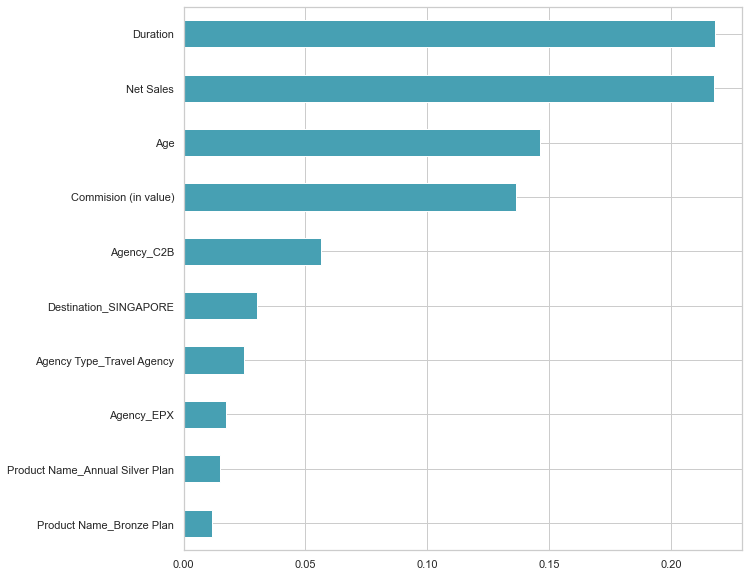

In [54]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])


plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=220, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

XGB.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [55]:
feat_importances.nlargest(10)

Duration                           0.218158
Net Sales                          0.217586
Age                                0.146080
Commision (in value)               0.136231
Agency_C2B                         0.056409
Destination_SINGAPORE              0.029906
Agency Type_Travel Agency          0.024619
Agency_EPX                         0.017199
Product Name_Annual Silver Plan    0.014957
Product Name_Bronze Plan           0.011754
dtype: float64

In [56]:
X_train_smote.head()

,Duration,Net Sales,Commision (in value),Age,Agency_ART,Agency_C2B,Agency_CBH,Agency_CCR,Agency_CSR,Agency_CWT,...,Destination_TURKMENISTAN,Destination_UKRAINE,Destination_UNITED ARAB EMIRATES,Destination_UNITED KINGDOM,Destination_UNITED STATES,Destination_UZBEKISTAN,Destination_VANUATU,Destination_VENEZUELA,Destination_VIET NAM,Destination_ZAMBIA
62297,15,85.523863,21.381853,40.492744,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31164,100,94.000000,0.000000,36.000000,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
51795,166,18.000000,6.300000,50.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27286,119,266.025748,66.508279,51.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14483,46,52.000000,18.200000,62.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])

column_names = ['Duration', 'Net Sales', 'Age', 'Commision (in value)', 'Agency_C2B', 'Destination_SINGAPORE', \
               'Agency Type_Travel Agency', 'Agency_EPX', 'Product Name_Annual Silver Plan', 'Product Name_Bronze Plan']
X = X[column_names]
updated_data_test = updated_data_test[column_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
scaler = StandardScaler()
#scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)



plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
XGB = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, monotone_constraints='()',
              n_estimators=220, n_jobs=4, nthread=4, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

XGB.fit(X_train, y_train)



y_pred1 = XGB.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred1))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred1))

Confusion Matrix: 
 [[12689   390]
 [  693  1921]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     13079
           1       0.83      0.73      0.78      2614

    accuracy                           0.93     15693
   macro avg       0.89      0.85      0.87     15693
weighted avg       0.93      0.93      0.93     15693



<Figure size 720x720 with 0 Axes>

# Random Forest Classification

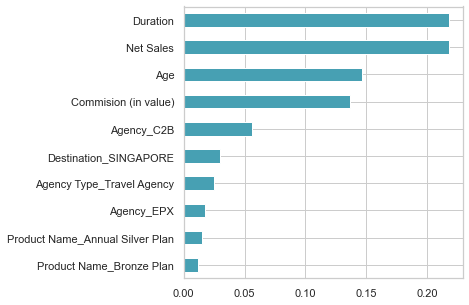

In [57]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])


plt.figure(figsize=(5, 5))
# Build a forest and compute the feature importances
rff = RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=50, random_state=9)

rff.fit(X, y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(forest.feature_importances_, index=X.columns)
feat_importances.nlargest(10).sort_values(ascending=True).plot(kind='barh')
plt.show()

In [64]:
y = df_train['Claim']
X = df_train.drop(columns=['Claim'])

column_names = ['Duration', 'Net Sales', 'Age', 'Commision (in value)', 'Agency_C2B', 'Destination_SINGAPORE', \
               'Agency Type_Travel Agency']
X = X[column_names]
updated_data_test = updated_data_test[column_names]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)
scaler = StandardScaler()
#scaler  = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)



plt.figure(figsize=(10, 10))
# Build a forest and compute the feature importances
rff = RandomForestClassifier(max_depth=4, max_features='sqrt', min_samples_leaf=5,
                       n_estimators=50, random_state=9)

rff.fit(X_train, y_train)



y_pred1 = rff.predict(X_test)
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred1))
print("=="*20)
print("Classification Report: \n",classification_report(y_test,y_pred1))

Confusion Matrix: 
 [[12440   639]
 [ 1648   966]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.95      0.92     13079
           1       0.60      0.37      0.46      2614

    accuracy                           0.85     15693
   macro avg       0.74      0.66      0.69     15693
weighted avg       0.84      0.85      0.84     15693



<Figure size 720x720 with 0 Axes>

# Common Function

In [12]:
# Write a function for data preprocessing
def age_convert(age):
    result = ''
    if(age <= 21):
        result = 'Child'
    elif(age <= 50):
        result = 'Adult'
    else:
        result = 'Senior'
    return result


def pre_processing(train_data):
    train_data['Age Group'] = train_data['Age'].map(lambda x: age_convert(x))
    train_data['Duration'][train_data['Duration'] < 0] = train_data['Duration'].median()
    train_data['Duration'][train_data['Duration'] > 540] = 540
    train_data['Age'][train_data['Age'] > 99] = train_data[train_data['Age Group'] == 'Senior']['Age'].mean()
  